In [ ]:
import pandas as pd
import numpy as np

major_class_name = "業種(大分類)_分類名"
medium_class_name = "業種(中分類)_分類名"
small_class_name = "業種(小分類)_分類名"

In [1]:
import glob

data_dir = glob.glob("./wakati_sudachi_majour/*.txt")

with open("wakati_major_cat.csv", "w") as f:
    f.write('業種(大分類),文章\n')
    
    for data in data_dir:
        with open(data, "r") as d:
            next(d)
            for line in d:
                #split_l = line.split(",")
                #cat = split_l[0].replace("__label__", "").strip()
                #sentence = split_l[-1].strip()

                #f.write(cat + ", " + sentence + "\n")   
                f.write(line.strip() + '\n')

In [ ]:
df.isna().sum()
df[df['業種(大分類)'].isnull()]

# LDAトピックモデルの作成
https://qiita.com/kenta1984/items/b08d5caeed6ed9c8abf1

In [5]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from collections import defaultdict
from sklearn.model_selection import train_test_split
import pandas as pd

# カテゴリ数を取得する。
df = pd.read_csv('concat_majour_cat.csv')
categories = df['業種(大分類)'].unique()
NUM_TOPICS = len(categories)

# 訓練データとtestデータに分ける
train_data, test_data = train_test_split(df, test_size=None, train_size=0.8, stratify=df['業種(大分類)'])

# 訓練データの整形
train_texts = []
train_sentenses = train_data['分かち書き'].values
for row in train_sentenses:
    train_texts.append(row.strip().split(' '))

# テストデータの整形
test_texts = []
test_sentenses = test_data['分かち書き'].values
for row in test_sentenses:
    test_texts.append(row.strip().split(' '))    
    
# テストデータの原文の整形
test_original_texts = []
test_original_sentenses = test_data[['業種(大分類)','文章']].values
test_original_sentenses_sen = test_data['文章'].values
test_original_sentenses_cat = test_data['業種(大分類)'].values

for row in test_original_sentenses:
    test_original_texts.append(row[0] + ',"' + row[1] + '"')

# 訓練データからモデル作成
dictionary = Dictionary(train_texts)
corpus = [dictionary.doc2bow(text) for text in train_texts]
lda_model = LdaModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)

# テストデータをモデルに掛ける
score_by_topic = defaultdict(int)
test_corpus = [dictionary.doc2bow(text) for text in test_texts]

# クラスタリング結果を出力
with open('lda_result.csv', 'w') as f:
    for unseen_doc, raw_train_text in zip(test_corpus, test_original_texts):
        #print(raw_train_text, end='\t')
        f.write(raw_train_text + ',')
        for topic, score in lda_model[unseen_doc]:
            score_by_topic[int(topic)] = float(score)
        for i in range(NUM_TOPICS):
            #print('{:.2f}'.format(score_by_topic[i]), end='\t')
            f.write('{:.2f}'.format(score_by_topic[i]) + ',')
        #print()
        f.write('\n')

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('lda_result.csv')
df.head(10)

# LDAトピックモデルのWordCloud
https://qiita.com/Spooky_Maskman/items/0d03ea499b88abf56819

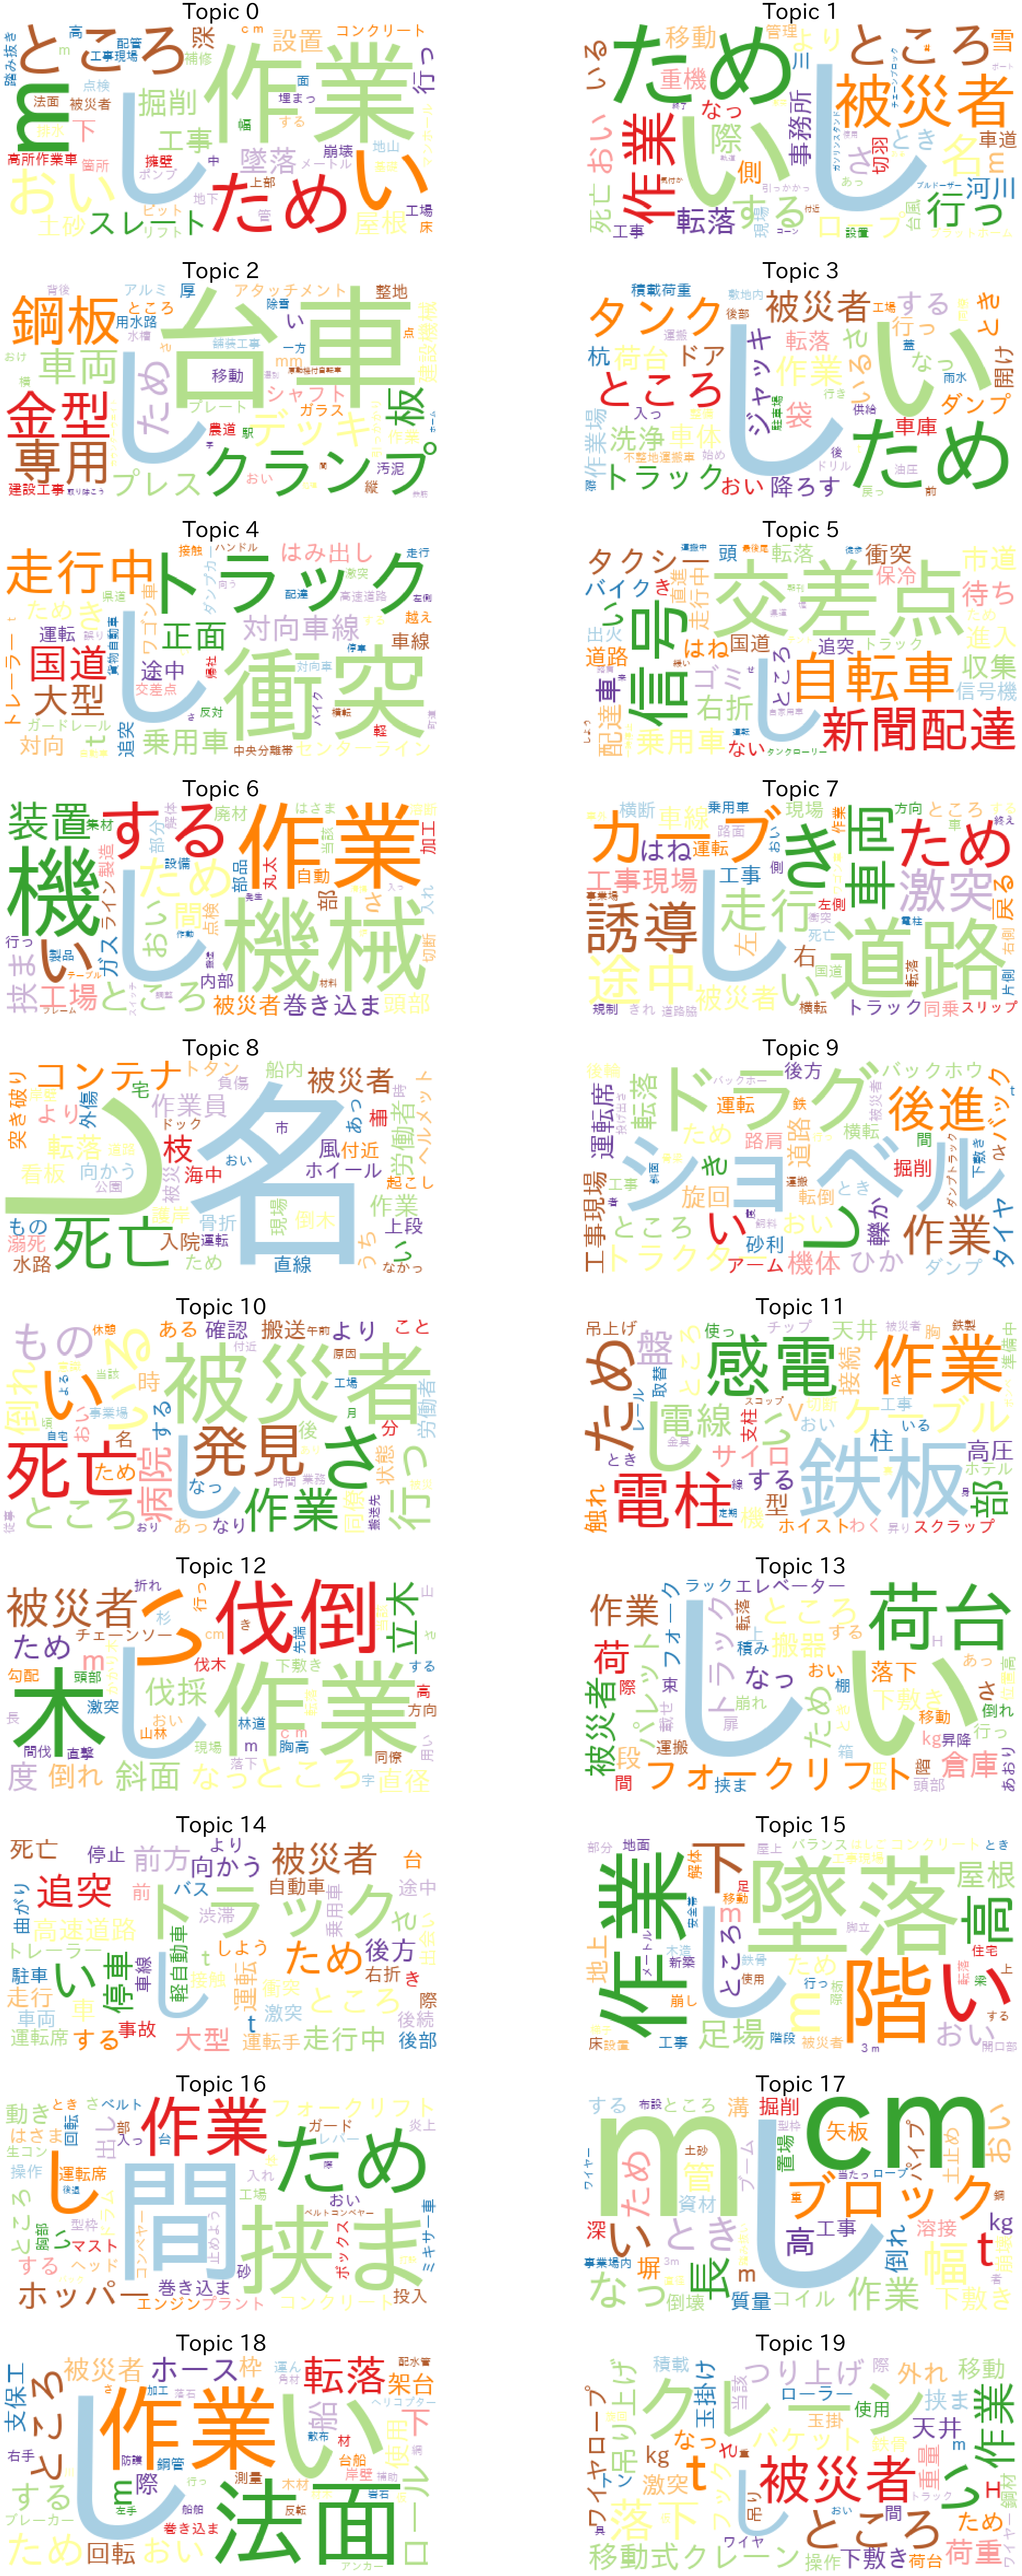

In [24]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "IPAexGothic"
plt.rcParams["font.size"] = 50

fig, axs = plt.subplots(ncols=2, nrows=int(lda_model.num_topics/2), figsize=(50,100))
axs = axs.flatten()

def color_func(word, font_size, position, orientation, random_state, font_path):
    return 'darkturquoise'

#mask = np.array(Image.open('ball.png'))

for i, t in enumerate(range(lda_model.num_topics)):

    x = dict(lda_model.show_topic(t, 50))
    im = WordCloud(
        font_path='/opt/anaconda3/envs/mhlw/lib/python3.6/site-packages/matplotlib/mpl-data/ipaexg.ttf',
        background_color='white',
        color_func=color_func,
        #mask=mask,
        random_state=0
    ).generate_from_frequencies(x)
    axs[i].imshow(im.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)
    axs[i].axis('off')
    axs[i].set_title('Topic '+str(t))
        
plt.tight_layout()
plt.show()

/opt/anaconda3/envs/mhlw/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc


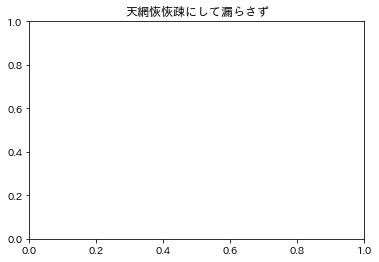

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

fonts = fm.findSystemFonts()

print(mpl.matplotlib_fname())

plt.rcParams['font.family'] = 'IPAexGothic'
plt.title('天網恢恢疎にして漏らさず')
plt.show()